Standard Deviation of Digit Frequency: 60.170
Chi-Square Statistic: 18.102


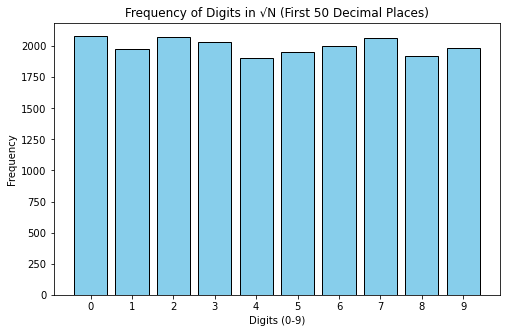

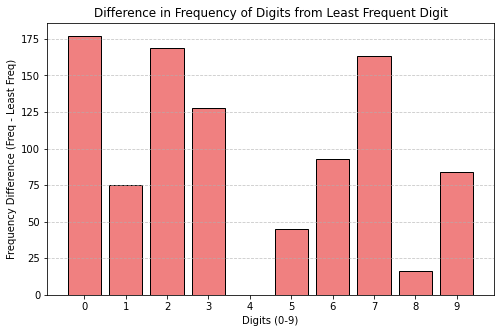

In [3]:
import mpmath
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Function to compute sqrt(N) with 50 decimal places
def compute_sqrt(N):
    uptoDecimal = 20000
    mpmath.mp.dps = uptoDecimal+1  # Set decimal precision to 50 places
    sqrt_N = mpmath.sqrt(N)
    sqrt_str = str(sqrt_N)  # Convert to string
    
    # Extract digits after decimal point
    decimal_part = sqrt_str.split('.')[1][:uptoDecimal]  
    return decimal_part

# Function to compute asymmetry measures
def compute_asymmetry(decimal_digits):
    # Initialize counts with zeros for all digits (0-9)
    digit_counts = Counter(decimal_digits)
    frequencies = np.array([digit_counts[str(d)] for d in range(10)])  # Frequency list for digits 0-9

    mean_freq = np.mean(frequencies)  # Expected frequency (uniform case)
    std_dev = np.std(frequencies)  # Standard deviation (higher means more asymmetry)
    max_min_diff = np.max(frequencies) - np.min(frequencies)  # Difference between max and min freq
    chi_square = np.sum((frequencies - mean_freq) ** 2 / mean_freq)  # Chi-square test statistic

    return std_dev, max_min_diff, chi_square

# Function to plot frequency of digits
def plot_digit_frequency(decimal_digits):
    digit_counts = Counter(decimal_digits)  # Count frequency of each digit
    digits = list(map(str, range(10)))  # Digits 0-9
    frequencies = [digit_counts[d] for d in digits]  # Get counts in order
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(digits, frequencies, color='skyblue', edgecolor='black')
    plt.xlabel("Digits (0-9)")
    plt.ylabel("Frequency")
    plt.title("Frequency of Digits in √N (First 50 Decimal Places)")
    plt.show()

# Function to compute frequency difference of each digit from the least frequent
def plot_frequency_diff(decimal_digits):
    digit_counts = Counter(decimal_digits)  # Count frequency of each digit
    digits = list(map(str, range(10)))  # Digits 0-9
    frequencies = np.array([digit_counts.get(d, 0) for d in digits])  # Frequency list (default 0 if missing)

    # Get the least frequent digit's frequency
    min_freq = np.min(frequencies)
    
    # Calculate the difference from the least frequent digit for each digit
    freq_diff = frequencies - min_freq
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(digits, freq_diff, color='lightcoral', edgecolor='black')
    plt.xlabel("Digits (0-9)")
    plt.ylabel("Frequency Difference (Freq - Least Freq)")
    plt.title("Difference in Frequency of Digits from Least Frequent Digit")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    
# Example usage
N = 7  # Change N as needed
decimal_digits = compute_sqrt(N)

# Compute asymmetry
std_dev, max_min_diff, chi_square = compute_asymmetry(decimal_digits)

# Display asymmetry measures
print(f"Standard Deviation of Digit Frequency: {std_dev:.3f}")
#print(f"Max-Min Frequency Difference: {max_min_diff}")
print(f"Chi-Square Statistic: {chi_square:.3f}")


plot_digit_frequency(decimal_digits)

plot_frequency_diff(decimal_digits)